In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [23]:
# Read the data into a Pandas dataframe
df = pd.read_parquet(path='./outage_data.parquet', engine='pyarrow')

# Remove duplicate entries in 2019
# Remove all rows with SimStartDate after 2019-01-01 and event_type == 'thunderstorm'
df = df.loc[~((df['SimStartDate'] > '2019-01-01') & (df['event_type'] == 'thunderstorm'))]

In [24]:
df_1_2 = df.iloc[:, 1002:2000]
df_1_2.head()

target = df['outage_count']

The feature with the highest correlation to the target is Absolute vorticity_s**-1 (instant)_lambert_level 50000 Pa-filtered_32-max_sum with a correlation of 0.08


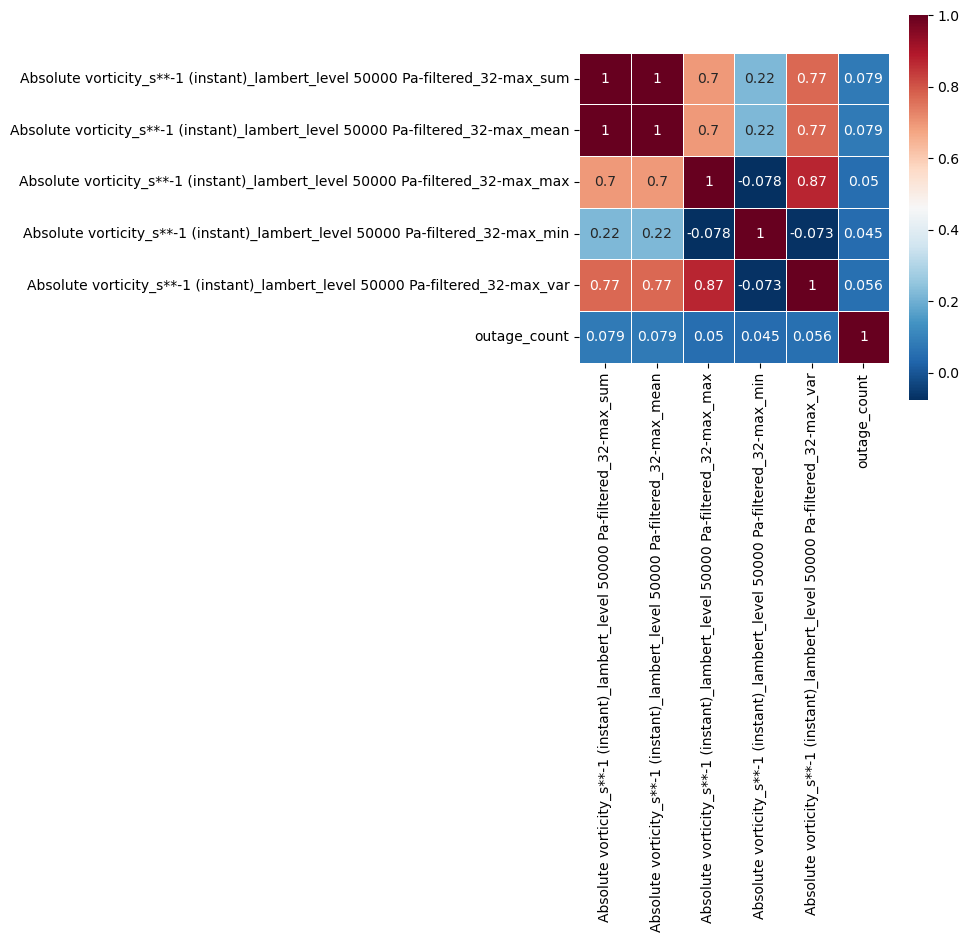

In [34]:
plt.figure(figsize=(5, 5))
cm_df = df_1_2.iloc[:, 0:5]
cm_df['outage_count'] = target
cm = cm_df.corr(method='pearson')
label_column = 'outage_count'
sns.heatmap(cm, annot=True, cmap='RdBu_r', linewidths=0.5, square=True)


# Find the feature with the maximum correlation with the label
max_corr_feature = cm.drop(label_column, axis=0)[label_column].idxmax()
max_corr_value = cm.drop(label_column, axis=0)[label_column].max()


# max_corr_feature = cm[label_column].idxmax()
# max_corr_value = cm[label_column].max()

print('The feature with the highest correlation to the target is {} with a correlation of {:.2f}'.format(max_corr_feature, max_corr_value))

# plt.show()
